In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv(r'C:\Users\emre_\Downloads\archive (15)\movies.csv')

In [5]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
df.dtypes
#shows us the types of datas we have for each column

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#change data types of columns and replacing NaN values to 0

df['budget'] = df['budget'].fillna(0).replace([float('inf'), -float('inf')], 0).astype('int64')

df['gross'] = df['gross'].fillna(0).replace([float('inf'), -float('inf')], 0).astype('int64')

In [12]:
#Finding the Correct Year Column
df = df.dropna()
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,On the Edge,PG-13,Drama,1985,"May 2, 1986 (United States)",6.8,214.0,Rob Nilsson,Roy Kissin,Bruce Dern,United States,0,0,Alliance Communications Corporation,95.0,1986
3425,The Acid House,Unrated,Comedy,1998,"January 1, 1999 (United Kingdom)",6.3,7400.0,Paul McGuigan,Irvine Welsh,Stephen McCole,United Kingdom,0,0,Picture Palace North,111.0,1999
835,Came a Hot Friday,PG,Adventure,1985,"October 4, 1985 (United States)",6.6,192.0,Ian Mune,Ronald Hugh Morrieson,Peter Bland,New Zealand,0,0,Mirage Films,101.0,1985
836,Wuthering Heights,Not Rated,Drama,1985,"October 9, 1985 (France)",6.5,339.0,Jacques Rivette,Pascal Bonitzer,Fabienne Babe,France,0,0,La Cecilia,130.0,1985


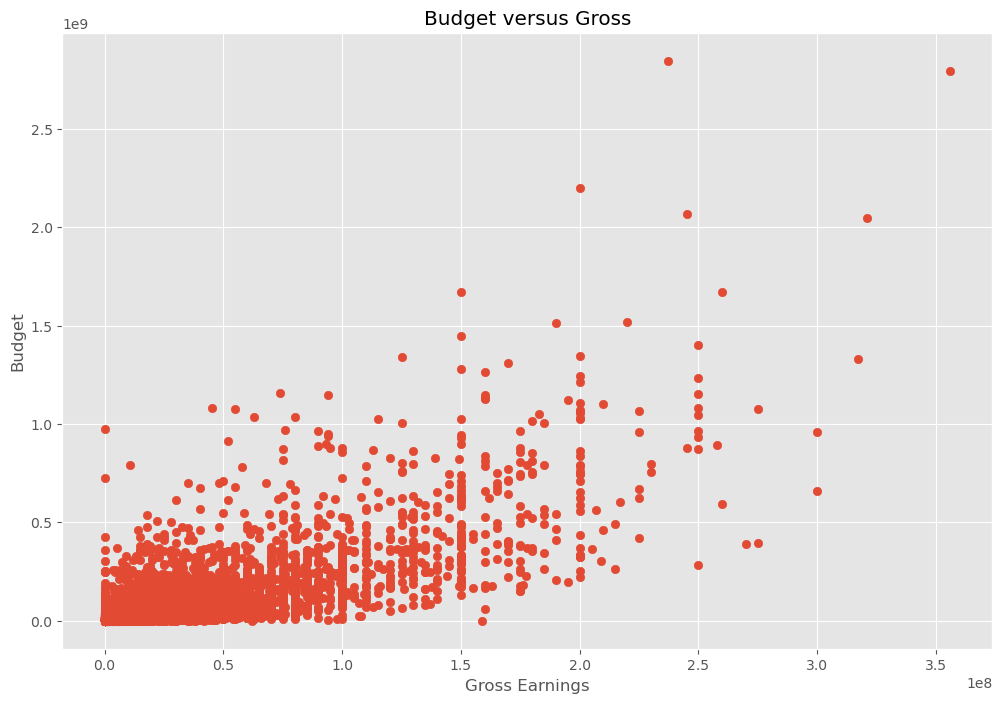

In [16]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget versus Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()
            

<Axes: xlabel='budget', ylabel='gross'>

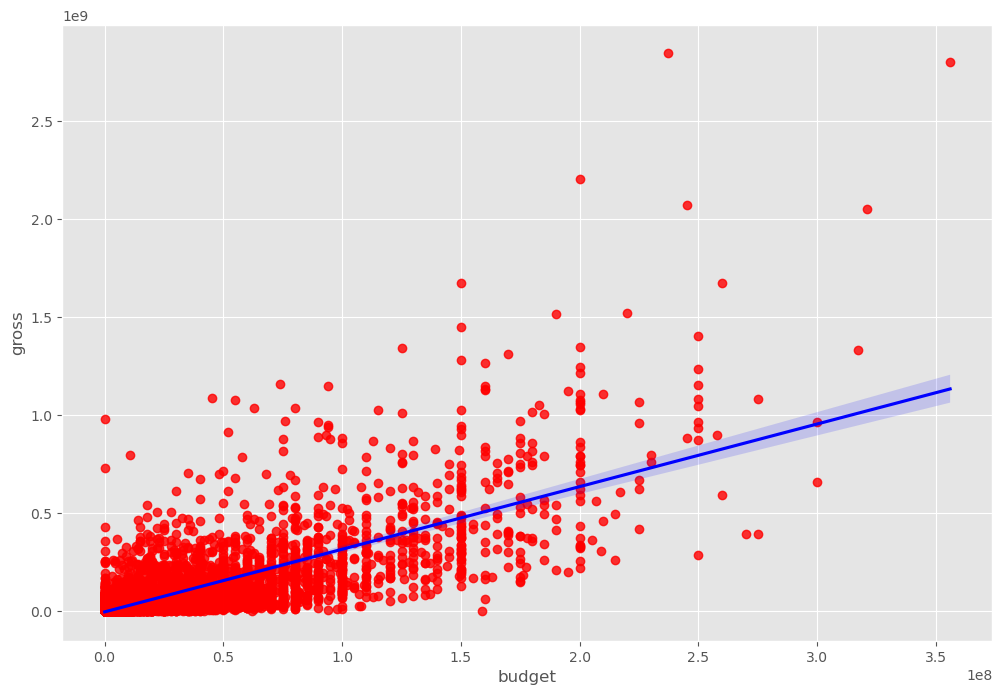

In [18]:
#Plot budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [20]:
#Looking at correlations
df.corr(numeric_only=True,method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366,0.222317
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042,0.305530
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942,0.257703
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000,0.120370
yearcorrect,0.997466,0.109815,0.222317,0.305530,0.257703,0.120370,1.000000


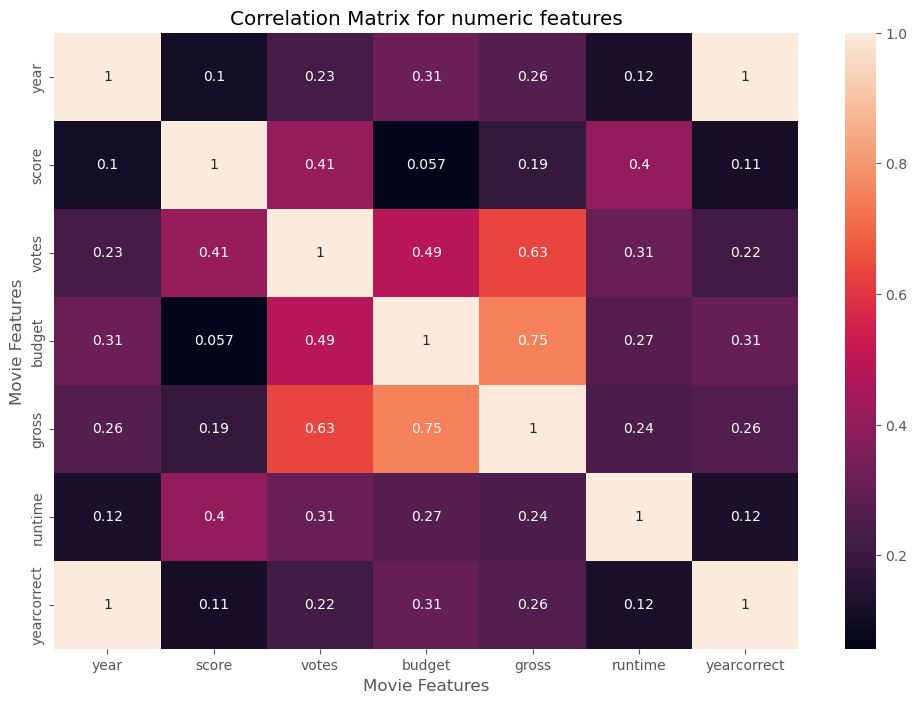

In [22]:
correlation_matrix=df.corr(numeric_only=True,method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [28]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        


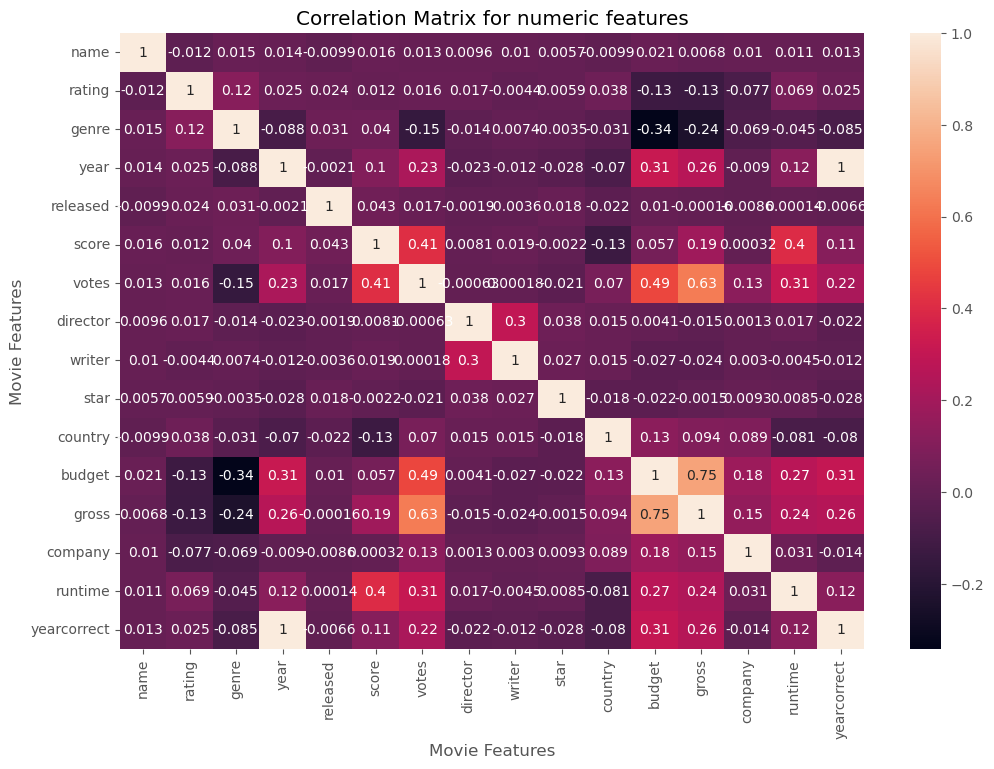

In [30]:
correlation_matrix=df_numerized.corr(numeric_only=True,method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [32]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.006817,0.010073,0.011151,0.012711
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128910,-0.076807,0.069089,0.025213
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.240903,-0.068678,-0.044631,-0.084559
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.264716,-0.009026,0.120676,0.997466
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,-0.000164,-0.008570,0.000145,-0.006580
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.188259,0.000316,0.400574,0.109815
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.632987,0.129596,0.309366,0.222317
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.015027,0.001337,0.017386,-0.022096
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.023834,0.003035,-0.004526,-0.012013
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.001470,0.009317,0.008474,-0.028103


In [34]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.149123
             genre          0.036784
             year           0.965105
             released       0.959218
                              ...   
yearcorrect  budget         0.283925
             gross          0.833094
             company        0.487168
             runtime        0.044475
             yearcorrect    1.000000
Length: 256, dtype: float64


In [36]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        rating        -0.088864
rating       genre         -0.088864
company      budget        -0.086194
budget       company       -0.086194
country      budget        -0.065245
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [38]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         company        0.522984
company      star           0.522984
writer       company        0.544346
company      writer         0.544346
             director       0.547867
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 86, dtype: float64


In [40]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2273    56329179122
2236    52514188890
710     43008941346
1769    40493607415
2208    40257053857
2270    36327887792
1676    19867862616
1571    15065592411
864     11873612858
2187    11795832638
866     11635441081
1601     9230230105
2102     8373718838
1813     7886344526
1080     7443502667
Name: gross, dtype: int64